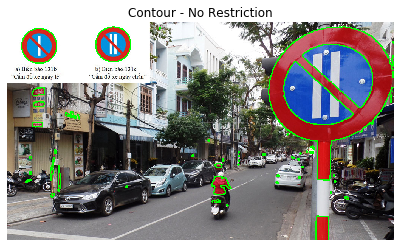

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import random
import os

import shutil
def imreadx(url,img_name):
    img = io.imread(url)
    outimg = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
#     cv2.imwrite(img_name,outimg)
    
    return outimg
def imshowx(img,title='B2DL'):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 4
    plt.rcParams["figure.figsize"] = fig_size
    
    plt.axis('off')
    plt.title(title)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()
def imshowgrayx(img,title='BD2L'):
    plt.axis('off')
    plt.title(title)
    plt.imshow(img,cmap=plt.get_cmap('gray'))
    plt.show()

def checkWidthHeight(cnt):
    x,y,w,h=cv2.boundingRect(cnt)
    a,b,c,d = x,y,w,h
   
    widthDivisionHeightRatio = w/h
   
    if widthDivisionHeightRatio <= 1.5 and widthDivisionHeightRatio >= 0.6:
        if w <= 30 or h <= 30:
            return False
        else:  
            print('x:'+str(x))
            print('y:'+str(y))
            print('w:'+str(w))
            print('h:'+str(h))
            print('w/h:'+str(widthDivisionHeightRatio))
            return True
    else:
        return False
    
def caculateColorPixelPercent(link,lower,):
    img = cv2.imread(link)
    size = img.size
    hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    mask_r1 = cv2.inRange(hsv,(0,100,100),(10,255,255))
    # imshowgrayx(mask_r1,'Mask Range 1')
    mask_r2 = cv2.inRange(hsv,(160,100,100),(180,255,255))
    # imshowgrayx(mask_r2,'Mask Range 2')
    mask_r = cv2.bitwise_or(mask_r1,mask_r2)
    imshowgrayx(mask_r,'Mask for Red Region')
    target = cv2.bitwise_and(img,img,mask=mask_r)
    num_brown = cv2.countNonZero(mask_r)
    perc_brown = num_brown/float(w*h)*100
    print(perc_brown)
    
def checkColorPercent(link):
    lower_white = np.array([0,0,0], dtype=np.uint8)
    upper_white = np.array([0,0,255], dtype=np.uint8)
    caculateColorPixelPercent()

    
url = 'https://image.thanhnien.vn/1080/uploaded/ngocthanh/2016_02_25/o-to_gvja.jpg'
tds_img = 'tds-1.jpg'
img = imreadx(url,tds_img)
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
mask_r1 = cv2.inRange(hsv,(0,100,100),(10,255,255))
# imshowgrayx(mask_r1,'Mask Range 1')
mask_r2 = cv2.inRange(hsv,(160,100,100),(180,255,255))
# imshowgrayx(mask_r2,'Mask Range 2')
mask_r = cv2.bitwise_or(mask_r1,mask_r2)
# imshowgrayx(mask_r,'Mask for Red Region')
target = cv2.bitwise_and(img,img,mask=mask_r)
# imshowx(target,'Mask for Red Rigon')
gblur = cv2.GaussianBlur(mask_r,(9,9),0)
edge_img = cv2.Canny(gblur,30,150)
# imshowgrayx(edge_img,'edge map')
img2 = img.copy()
# itmp, cnts, hierarchy = cv2.findContours(edge_img.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts, hierarchy = cv2.findContours(edge_img.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img2,cnts,-1,(0,255,0),2)
imshowx(img2,'Contour - No Restriction')



Something else went wrong
x:541
y:407
w:53
h:50
w/h:1.06


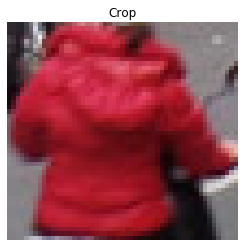

16_crop.jpg
Something else went wrong
Something else went wrong
Something else went wrong
Something else went wrong
Something else went wrong
Something else went wrong
x:732
y:104
w:184
h:167
w/h:1.1017964071856288


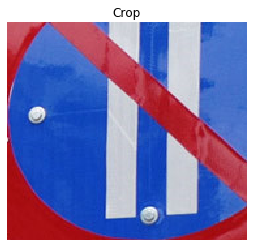

58_crop.jpg
x:781
y:59
w:187
h:168
w/h:1.1130952380952381


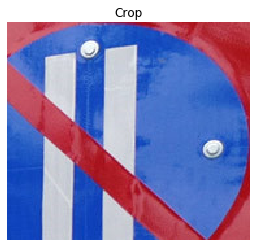

62_crop.jpg
x:38
y:16
w:94
h:93
w/h:1.010752688172043


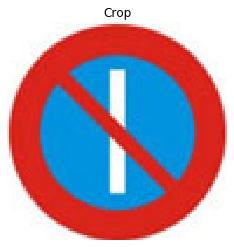

64_crop.jpg
x:234
y:12
w:93
h:93
w/h:1.0


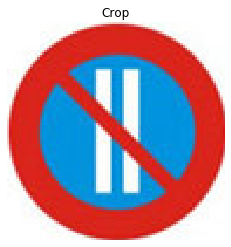

66_crop.jpg
x:692
y:11
w:332
h:407
w/h:0.8157248157248157


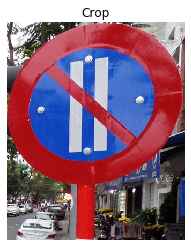

67_crop.jpg


In [6]:
img2=img.copy()
directory = '/Volumes/home/khoi/Project/traffic_sign_detection/media'
shutil.rmtree(directory) 
os.mkdir(directory)
os.chdir(directory+'/') 
for index, cnt in enumerate(cnts):
    try:
        area = cv2.contourArea(cnt)
        ellipse = cv2.fitEllipse(cnt)
        cv2.ellipse(img2,ellipse,(0,255,0),2)
        isAcceptWidthHeightImage = checkWidthHeight(cnt)
        if isAcceptWidthHeightImage == True:
            x,y,w,h=cv2.boundingRect(cnt)
            crop = img[y:y+h, x:x+w]
            imshowx(crop,'Crop')
            filename = str(index)+'_crop.jpg'
            print(filename)
            cv2.imwrite(filename, crop) 
#             caculateRedPixelPercent(filename)
            cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),3)
    except NameError:
        print("except")
    except:
        print("Something else went wrong")
    
